<h1>Data Exploration & Pre-Processing</h1>

<h3>Reading Data</h3>

Data is included in this project git repo. It's also available for download at https://www.kaggle.com/gummulasrikanth/hr-employee-retention.

In [25]:
import os
import pandas as pd

data_file = os.path.abspath('./data/HR_comma_sep.csv')
df = pd.read_csv(data_file)

Tidy up the feature names. In particular, there are some mistakes and inconsitencies in these.

In [26]:
from pprint import pprint

headers = df.columns.tolist()

print('Original feature names:')
pprint(df.columns.tolist())

# Fix an error in the header names
headers = [h.replace('sales', 'department') for h in headers] 

# Fix an typo in the headers
headers = [h.replace('average_montly_hours', 'average_monthly_hours') for h in headers] 

# Standardise feature naming conventions
headers = [h.replace('Work_accident', 'work_accident') for h in headers] 

# Adjust features names to be more descriptive
headers = [h.replace('number_project', 'number_of_projects') for h in headers] 
headers = [h.replace('time_spend_company', 'time_spent_at_company') for h in headers] 

df.columns = headers

print('\nNew feature names:')
pprint(df.columns.tolist())

Original feature names:
['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

New feature names:
['satisfaction_level',
 'last_evaluation',
 'number_of_projects',
 'average_monthly_hours',
 'time_spent_at_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']


<h2>Simple Exploration</h2>

Now we'll dive into the data to better understand it. Our motivation here is only to understand it enough to identify & handle any problems, and to prepare the features for further detailed analysis.

In [27]:
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [28]:
print('Number of features =', len(df.columns) - 1) # minus 1 for the target labels
print('Number of data points =', len(df))
print('Number of employees who left =', len(df[df.left==1]),'(%0.1f%%)' % (100. * len(df[df.left==1])/ len(df)))
print('Number of employees who remained =', len(df[df.left==0]),'(%0.1f%%)' % (100. * len(df[df.left==0])/ len(df)))

Number of features = 9
Number of data points = 14999
Number of employees who left = 3571 (23.8%)
Number of employees who remained = 11428 (76.2%)


We'll do some basic checks on the feature data now. First we'll group them into core data types to perform similar checks on similar data.

In [29]:
numerical_features = ['satisfaction_level','last_evaluation','number_of_projects','average_monthly_hours','time_spent_at_company']

boolean_features = ['work_accident','left','promotion_last_5years']

categorical_features = ['department','salary']

<h2>Numerical Features</h2>

<p>We can visually inspect all our numeric features to make sure we don't have any outliers. For ease of visualisation, we can apply simple rescaling<br> ((x - min) / (max - min)) so that they are displayed on the same axis scale in our visualisation. We use a boxplot to show the the variability of the data, including outliers.</p>

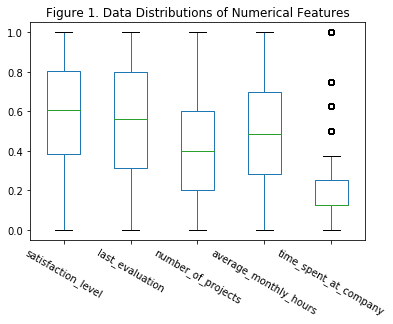

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

rescale = lambda x: 1. * (x - x.min()) / (x.max() - x.min())
scaled_numeric_df = df[numerical_features].apply(rescale)
scaled_numeric_df.plot.box(rot=-30, title='Figure 1. Data Distributions of Numerical Features')

We can see from this that for most features, there are no significant outliers.

The exception is for time_spent_at_company. But if we look at a histogram of the data without scaling, the data looks reasonable given the nature of this feature: We would expect to see more people staying at the company at the lower end (in this case, 2-4 years) and then for the amounts to tail off as there is a kind of decay of employees. The maximum value here is 10, which is only about twice the value of common data. I consider this reasonable enough to leave in. But there does seem to be a divide around 6 years that might be useful to explore later on.

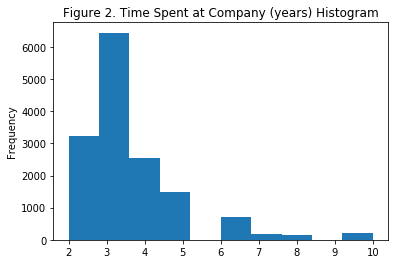

In [31]:
df[['time_spent_at_company']].plot.hist(title='Figure 2. Time Spent at Company (years) Histogram', legend=False)

<h2>Boolean Features</h2>

These are provided as integer values of 0 or 1. We'll first that ALL values are 0 or 1, and then convert to explicit boolean data types.

In [32]:
for feature_name in boolean_features:
    d = df[feature_name]
    assert len(d) == len([x for x in d if x in [0,1]])
print('All boolean features are represented by a 0 or 1 - Good!')

for feature_name in boolean_features:
    df[feature_name] = df[feature_name].astype('bool')
    
print('All boolean features have been converted to boolean True/False values!')

All boolean features are represented by a 0 or 1 - Good!
All boolean features have been converted to boolean True/False values!


<h2>Categorical Features</h2>

We'll now inspect the categorical data to ensur labelling is consistent, and then encode the categories appropriately.

In [33]:
for feature_name in categorical_features:
    print(feature_name)
    pprint(sorted(set(df[feature_name])))
    
encoded_df = df.copy()
for feature_name in categorical_features:
    encoded_feature_data = pd.get_dummies(encoded_df[feature_name], prefix=feature_name)
    encoded_df = encoded_df.drop([feature_name], inplace=False, axis=1)
    encoded_df = pd.concat([encoded_df, encoded_feature_data], axis=1)

df = encoded_df

df.head()

department
['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']
salary
['high', 'low', 'medium']


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,False,True,False,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,False,True,False,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,False,True,False,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,False,True,False,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,False,True,False,0,0,...,0,0,0,0,1,0,0,0,1,0


<h2>Save Processed data</h2>

In [34]:
processed_data_file = os.path.abspath('./data/processed_HR_comma_sep.csv')
df.to_csv(processed_data_file, index=False)

<h1>Data Analysis</h1>

<h2>Data Summary</h2>

<p>At the stage, we've already performed some pre-processing on the data to tidy it up, check for outliers, and perform encoding on categorical features. Please see the accompanying notebook HR Analytics - Data Preprocessing for details on this.</p>

In [38]:
# Setup matplotlib for notebook display
%matplotlib inline
import matplotlib.pyplot as plt

# Load the processed data in
import os
import pandas as pd

processed_data_file = os.path.abspath('./data/processed_HR_comma_sep.csv')
df = pd.read_csv(processed_data_file)

# Preview the data
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,False,True,False,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,False,True,False,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,False,True,False,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,False,True,False,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,False,True,False,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
# Basic stats
print('Number of features =', len(df.columns) - 1)# minus 1 for the target labels
print('Number of data points =', len(df))
print('Number of employees who left =', len(df[df.left==1]),'(%0.1f%%)' % (100. * len(df[df.left==1])/ len(df)))
print('Number of employees who remained =', len(df[df.left==0]), '(%0.1f%%)' % (100. * len(df[df.left==0])/ len(df)))

Number of features = 20
Number of data points = 14999
Number of employees who left = 3571 (23.8%)
Number of employees who remained = 11428 (76.2%)


<h3>Observations</h3>

<p>It's worth noting the imbalance between emloyess who left and remained. Simply by "guessing" an employee remained would give us a 76% accuracy. Also, being able to predict employees who would leave is more important, as this is where these is cost to the company and where action can be taken. We do still have a significant number of employees who left in our data set so it's not a significant problem.

We have a reasonable number of data points to work with. We also have a reasonable number of features to work with - not so many that dimensionality will be a major problem.</p>

<h2>Measure of Central Tendency & Variation</h2>

In [40]:
# Check out averages & ranges for numerical fields

numerical_features = ['satisfaction_level','last_evaluation', 'number_of_projects', 'average_monthly_hours', 'time_spent_at_company']

mean = df[numerical_features].mean(axis=0).to_frame('mean')
std = df[numerical_features].std(axis=0).to_frame('std. dev.')
min_ = df[numerical_features].min(axis=0).to_frame('min')
max_ = df[numerical_features].max(axis=0).to_frame('max')

pd.concat([min_, mean, max_, std], axis=1)

,min,mean,max,std. dev.
satisfaction_level,0.09,0.612834,1.0,0.248631
last_evaluation,0.36,0.716102,1.0,0.171169
number_of_projects,2.00,3.803054,7.0,1.232592
average_monthly_hours,96.00,201.050337,310.0,49.943099
time_spent_at_company,2.00,3.498233,10.0,1.460136


<h2>Feature Distribution</h2>

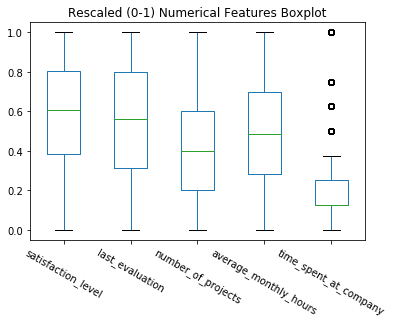

In [42]:
# Plot rescaled numerical features to view data distribution and range

# Note: Rescale the features for the benefit of visual comparison in the graph
rescale = lambda x: 1. * (x - x.min()) / (x.max()-x.min())

scaled_numeric_df = df[numerical_features].apply(rescale)
scaled_numeric_df.plot.box(rot=-30, title="Rescaled (0-1) Numerical Features Boxplot")


<h2>Feature Correlation</h2>
<p>Here we investigate possible correlations between features. Here we plot all numerical features against each other, then just continuous numerical features against each other.</p>

Text(0.5, 0.98, 'Figure 3. Continuous Numerical Features Scatter Matrix')

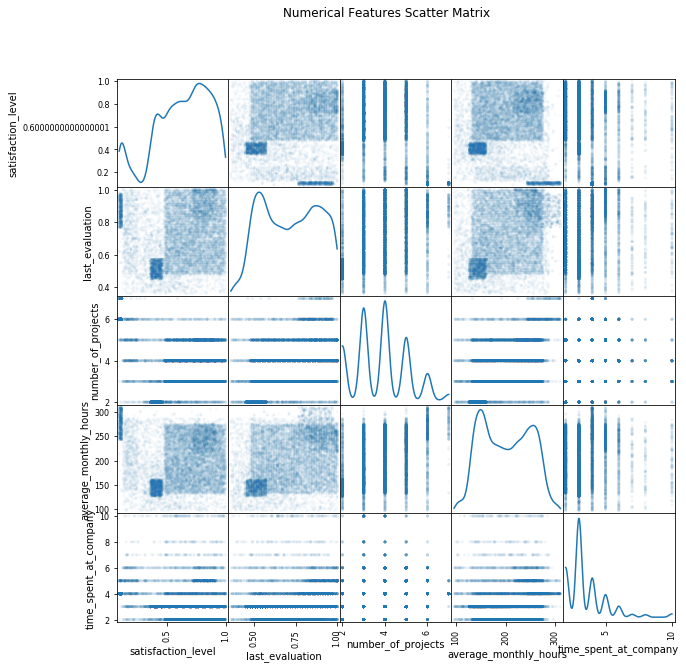

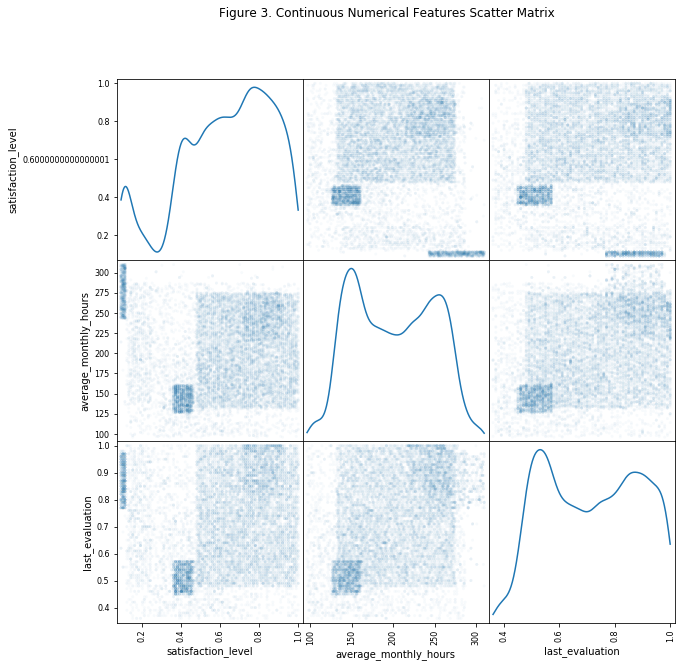

In [43]:
pd.plotting.scatter_matrix(df[numerical_features], alpha=0.03, figsize=(10,10), diagonal='kde')
plt.suptitle('Numerical Features Scatter Matrix')

pd.plotting.scatter_matrix(df[['satisfaction_level', 'average_monthly_hours', 'last_evaluation']],
                               alpha=0.03, figsize=(10,10), diagonal='kde')
plt.suptitle('Figure 3. Continuous Numerical Features Scatter Matrix')

<h3>Observations</h3>

<p>We notice some interesting patterns in our data. We can clearly see different distributions of data, which suggest different types or clusters of data points. However, the truncated edges of the distribution (visibile as the rectangular patterns) are unusual and I suspect that this is due to how the data was artificially simulated.

Assuming these are artificial artefacts: While this is not an ideal reproduction of real data, I'll proceed from here by assuming that the data distributions were at least generated based on real world insights. We were aware the data was simulated and therefore wouldn't be completely representative of the real world.</p>

Text(0.5, 0.98, 'Continuous Numerical Features Scatter Matrix - Remainers Only')

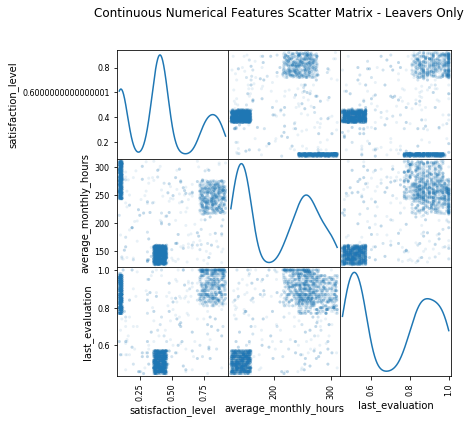

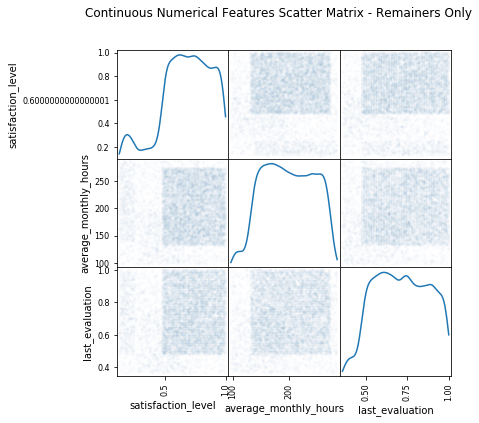

In [44]:
# Given the visual clusters above, we plot the graphs again split on:

# 1) employees who left
df_toplot = df[df["left"]==1][['satisfaction_level', 'average_monthly_hours', 'last_evaluation']]
pd.plotting.scatter_matrix(df_toplot, alpha=0.1, figsize=(6,6), diagonal='kde')
plt.suptitle('Continuous Numerical Features Scatter Matrix - Leavers Only')

# 2) employees who remained
df_toplot = df[df["left"]==0][['satisfaction_level', 'average_monthly_hours', 'last_evaluation']]
pd.plotting.scatter_matrix(df_toplot, alpha=0.01, figsize=(6,6), diagonal='kde')
plt.suptitle('Continuous Numerical Features Scatter Matrix - Remainers Only')


<h3>Observations</h3>

<p>This demonstrates some clearly different patterns in the data distribution, which suggests with some cluster analysis we can start to predict leave/remain status for similarly grouped employees.

To corellate how different categorical features relate to whether employees left, we can look at the percentage of leavers within each split. We'll do this for departments, salaries, and other (work accident, promotion in last 5 years) groupings. We plot these percentages below as heatmaps.</p>

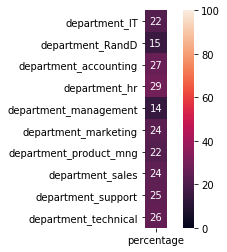

In [45]:
import seaborn as sns

departments = [c for c in df.columns if c.startswith("department_")]
perc_leavers_by_department = df[df.left][departments].sum() / df[departments].sum() * 100
_ = sns.heatmap(pd.DataFrame(perc_leavers_by_department, columns=["percentage"]),
                square=True, annot=True, vmin=0, vmax=100)

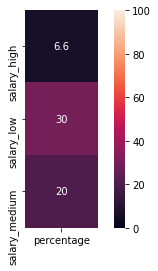

In [46]:
salaries = [c for c in df.columns if c.startswith("salary_")]
perc_leavers_by_salary = df[df.left][salaries].sum() / df[salaries].sum() * 100
_ = sns.heatmap(pd.DataFrame(perc_leavers_by_salary, columns=["percentage"]),
                square=True, annot=True, vmin=0, vmax=100)

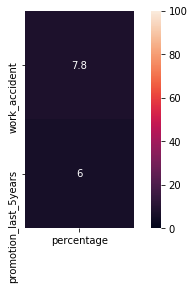

In [47]:
other = ["work_accident", "promotion_last_5years"]
perc_leavers_by_other = df[df.left][other].sum() / df[other].sum() * 100
_ = sns.heatmap(pd.DataFrame(perc_leavers_by_other, columns=["percentage"]),
                square=True, annot=True, vmin=0, vmax=100)

<h3>Observations</h3>

<p>We start to see some variation in different categories & features here. In particular, employes in the Management & RND departments, on high salaries, and who had a recent promotion look less likely to leave. However, these don't look fully independent. In particular, I would expect there to be a correlation between Management & high salary & recent promotions.</p>

<h2>Cluster Analysis</h2>

<p>From the earlier scatter matrix plots, we've already seen what looked like different clusters with different distributions in our data. We previously visualised this in a cross scatter plot over 3 features. Below we combine these in a 3d plot, highlighting employees in red, to get a view on possible clusters. In this graph, we do see some clear cluster of leavers, so we hope to be able get some useful insight here.</p>

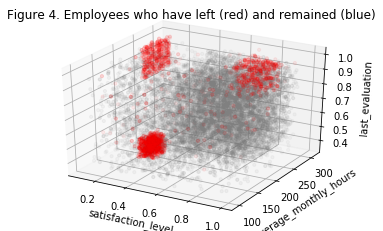

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = [(1, 0, 0, 0.1) if v==True else (0.5, 0.5, 0.5, 0.1) for v in df['left']]
xyz = [df['satisfaction_level'], df['average_monthly_hours'], df['last_evaluation']]
ax.set_xlabel('satisfaction_level')
ax.set_ylabel('average_monthly_hours')
ax.set_zlabel('last_evaluation')
ax.set_title('Figure 4. Employees who have left (red) and remained (blue)')
_ = ax.scatter(*xyz, c=colors, s=10)

<h3>Observations</h3>

<p>From our previous visualisations and this latest one, it looks like there is overlap between our clusters. Given this, a soft clustering method, such as a Guassian cluster, is a good technique to apply. It looked liked we might have about 5 clusters from our visualisations, so let's start with trying that many.</p>

In [49]:
from sklearn.mixture import GaussianMixture

# Number of clusters, chosen based on visual inspection
n_components = 5

cols = ['satisfaction_level','average_monthly_hours', 'last_evaluation']
xdf = df[cols]

gm = GaussianMixture(n_components=n_components, random_state=789)
gm.fit(xdf)

print("Cluster Means:")
print("\n".join([str([round(_*100)/100. for _ in m]) for m in gm.means_]))
print("Cluster Weights:")
print("\n".join([str(w) for w in gm.weights_]))

Cluster Means:
[0.77, 245.08, 0.78]
[0.66, 157.5, 0.7]
[0.1, 277.27, 0.87]
[0.58, 204.06, 0.71]
[0.41, 143.64, 0.51]
Cluster Weights:
0.2915240667658375
0.2785223017743804
0.05867686378200763
0.26707898998729784
0.10419777769047611


<h3>Observations</h3>

<p>At a glance, these look reasonable. Most apparent is that [0.1, 277.27, 0.87], [0.41, 143.64, 0.51] and [0.77, 245.08, 0.78] seem to have identified the centre of clusters of high numbers of employees who left.</p>

In [50]:
# Apply our model to predict clusters & merge with our data

predicted_clusters = pd.DataFrame(gm.predict(xdf))
predicted_clusters.columns = ["cluster"]
df_with_clusters = pd.concat([df, predicted_clusters], axis=1)
df_with_clusters.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,cluster
0,0.38,0.53,2,157,3,False,True,False,0,0,...,0,0,0,1,0,0,0,1,0,4
1,0.80,0.86,5,262,6,False,True,False,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.11,0.88,7,272,4,False,True,False,0,0,...,0,0,0,1,0,0,0,0,1,2
3,0.72,0.87,5,223,5,False,True,False,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0.37,0.52,2,159,3,False,True,False,0,0,...,0,0,0,1,0,0,0,1,0,4


In [51]:
# Check distributions of data over clusters, and percentage of leavers in each cluster

total_cluster_counts = df_with_clusters[['cluster', 'left']].groupby('cluster').count()
print("Total cluster sizes")
print(total_cluster_counts)

leaver_cluster_counts = df_with_clusters[df.left==True][['cluster', 'left']].groupby('cluster').count()
print("Cluster sizes")
print(leaver_cluster_counts)

print("% Leavers in clusters")
perc_leavers_per_cluster = leaver_cluster_counts/total_cluster_counts*100
print(perc_leavers_per_cluster)


Total cluster sizes
         left
cluster      
0        4656
1        4811
2         886
3        3007
4        1639
Cluster sizes
         left
cluster      
0         940
1         113
2         881
3         119
4        1518
% Leavers in clusters
              left
cluster           
0        20.189003
1         2.348784
2        99.435666
3         3.957433
4        92.617450


<p>This gives us some promising results: For an employee within cluster 2 or 4, we already know they are at a very high risk of leaving. Similarly, an employee in cluster 1 or 3 is likely to remain.</p>

In [52]:
# Simple estimate of predictive performance of clusters

# 1) Using the frequency of leavers in each cluster as probabilities to predict the most likely classification 
most_likely_probabilities = perc_leavers_per_cluster.apply(lambda vs: [max(v, 100-v)/100. for v in vs])

# 2) We effectively form a weighted probability estimate, based on the total cluster sizes
est_total_correct_classifications = (most_likely_probabilities * total_cluster_counts).sum()

# 3) Sum our results and return as a ratio of our data set size 
print("Estimated accuracy of cluster model =", (est_total_correct_classifications / total_cluster_counts.sum())[0])

Estimated accuracy of cluster model = 0.9134608973931595


<h3>Observations</h3>

<p>Our clustering appears to have been successful in identifying patterns within our data. And these patterns also carry information about employees who leave or remain. When we come to focus on predictive modelling, it may be that applying cluster information to the data could aid our model.</p>

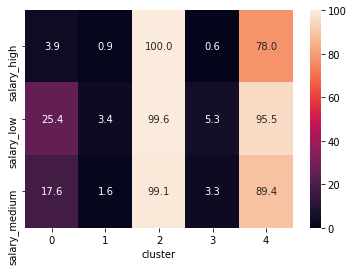

In [53]:
# Visualise percentage of leavers in each combined grouping of cluster & salary 
salary_counts = df_with_clusters[['left', 'cluster']+salaries].groupby(['left', 'cluster']).sum()
perc_leavers_by_salary = salary_counts.transpose()[True] / salary_counts.groupby('cluster').sum().transpose() * 100
sns.heatmap(perc_leavers_by_salary, annot=True, fmt='.1f', vmin=0, vmax=100)

<p>Within each cluster, the percentage of leavers per salary band is relatively stable with a little variation.</p>

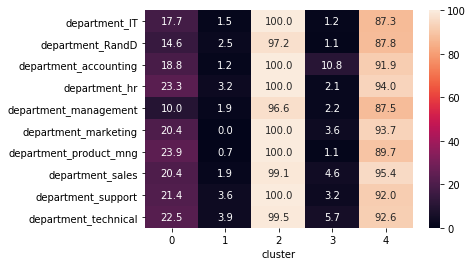

In [54]:
# Visualise percentage of leavers in each combined grouping of cluster & department 
department_counts = df_with_clusters[['left', 'cluster']+departments].groupby(['left', 'cluster']).sum()
perc_leavers_by_department = department_counts.transpose()[True] / department_counts.groupby('cluster').sum().transpose() * 100
sns.heatmap(perc_leavers_by_department, annot=True, fmt='.1f', vmin=0, vmax=100)

Within each cluster, the percentage of leavers per department band is relatively stable with a little variation.

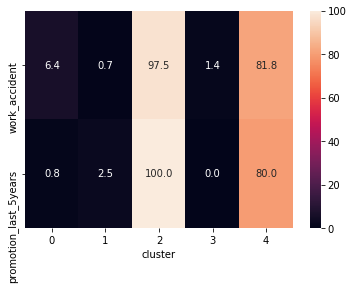

In [55]:
other_counts = df_with_clusters[['left', 'cluster', 'work_accident', 'promotion_last_5years']].groupby(['left', 'cluster']).sum()
perc_leavers_by_other = other_counts.transpose()[True] / other_counts.groupby('cluster').sum().transpose() * 100
sns.heatmap(perc_leavers_by_other, annot=True, fmt='.1f', vmin=0, vmax=100)

<p>Again, within each cluster, the percentage of leavers per grouping is relatively stable with a little variation.</p>

<h3>Observations</h3>

<p>In the above graphs, we look at the percentage of people who left split across salary, department & other categorical features. Generally, it looks like there is little additional variation on probability of leaving based on a single categorical feature here.</p>

<h2>Data Generation</h2>

<p>As a check on our clusters, we can generate our own artificial data points from our clusters and see how it compares to our actual data. We can see from the graphs below that the general clustering is represented. It doesn't exhibit the range and truncated edges of the distributions due to the model we used - but to replicate this would risk overfitting to assumed artificial aspects of the training data.</p>

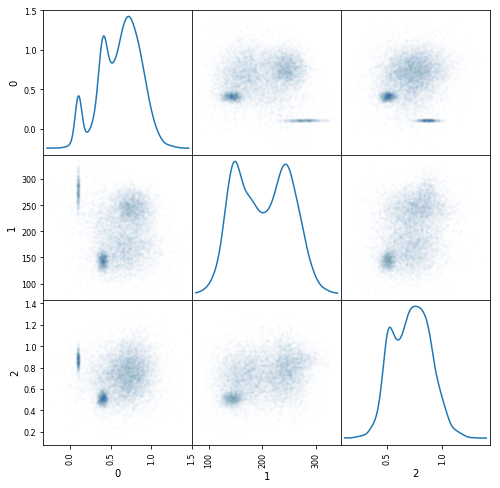

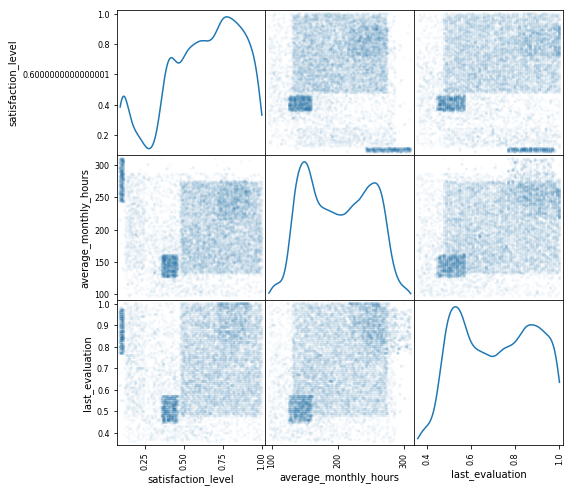

In [56]:
fake_df = pd.DataFrame(gm.sample(n_samples=10000)[0])
_ = pd.plotting.scatter_matrix(fake_df, alpha=0.01, figsize=(8,8), diagonal = 'kde')
# Note: We use the same column ordering as what was used to generate the cluster model
_ = pd.plotting.scatter_matrix(df[['satisfaction_level','average_monthly_hours', 'last_evaluation']], alpha=0.03, figsize=(8,8), diagonal = 'kde')

<h2>Component Analysis</h2>
<p>We'll now apply some simple Principle Component Analysis to investigate which features are providing most variance.</p>

In [57]:
from sklearn.decomposition import PCA

# Note: Use numerical features only
pca_df = df.copy()[numerical_features]

# Note: Rescale our data, as PCA results vary based on units or scale of features.
rescale = lambda x: 1. * (x - x.min()) / (x.max()-x.min())
rescaled_df = pca_df.copy()
for col in rescaled_df.columns:
    rescaled_df[col] = rescaled_df[[col]].astype(float).apply(rescale)

    
ca = PCA()
ca.fit_transform(rescaled_df)

print("Explained variance of components:")
print(["%.03f" % var for var in ca.explained_variance_ratio_])

Explained variance of components:
['0.375', '0.269', '0.141', '0.113', '0.103']


In [59]:
print("Feature weighting per component")
print(" ".join([col.ljust(20) for col in pca_df.columns.tolist()]))
for component in ca.components_:
    print(" ".join([("%.03f" % v).ljust(20) for v in component]))

Feature weighting per component
satisfaction_level   last_evaluation      number_of_projects   average_monthly_hours time_spent_at_company
-0.060               0.627                0.573                0.500                0.157               
-0.936               -0.285               0.183                0.004                0.098               
-0.294               0.719                -0.377               -0.505               0.002               
0.183                -0.090               0.571                -0.659               0.445               
0.023                -0.037               -0.412               0.245                0.876               


Cumulative Explained Variance =
[0.3745129  0.64392904 0.7845009  0.89730552 1.        ]


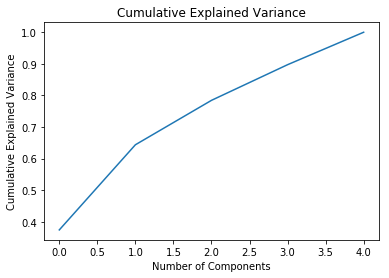

In [60]:
import numpy as np
plt.plot(np.cumsum(ca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

print('Cumulative Explained Variance =')
print(np.cumsum(ca.explained_variance_ratio_))

<h3>Observations</h3>

<p>Looking at the above chart, there is a close to linear accumulation of explained variance over the components. In fact to represent at least 90% of the datas variation. It would be neccessary to use all components - with each component contributing at least 10% (and up to 37.5%) of the variance.

Overall, the results here don't appear to offer much insight or helpfulness for further analysis.</p>

In [61]:
# Split our data into features & labels in separate training, validation & test sets.
# We'll use the validation set to help measure our models performance as we develop it
# We'll hold out the test set until final evaluation of the model

from sklearn.model_selection import train_test_split

def split_data(dataframe):
    
    features = dataframe.copy()
    labels = features.pop('left')

    X_train, X_val, Y_train, Y_val = train_test_split(features, labels, test_size=0.3, random_state=789)
    X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.5, random_state=789)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [62]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(df)

print(len(X_train), len(X_val), len(X_test))

10499 2250 2250


<h2>Initial Model Selection</h2>

<p>We'll start with using a selection of classifiers. Upon initial analysis, we'll decided which onces to proceed further with. The models and some key reasons for their selection are listed below:

- Logistic Regression: A boosted version was used in our benchmark model. A simple to understand and often effective model for classification.

- Support Vector Machines: A successful algorithm for classification problems.

- Decision Tree Classifier: A simple and easy to interpret model.

- Random Forest Classifier: An ensemble decision tree model. Can be very powerful, but harder to interpret.</p>


In [63]:
%%time

# Create & train classifiers

# Benchmark model
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=789)

from sklearn.svm import SVC
svm_clf = SVC(random_state=789)

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=789)

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=789)

classifiers = [lr_clf, svm_clf, tree_clf, rf_clf]

# Train all our classifiers
for clf in classifiers:
    clf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


CPU times: user 3.36 s, sys: 60.7 ms, total: 3.42 s
Wall time: 3.42 s


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


We'll now introduce our two proposed metrics for measuring performance:

- Accuracy: For overall classification ability

- Recall: For a more focused measure of ability to detect leavers

In [69]:
%%time

# Measure training predictions
from sklearn.metrics import precision_score, recall_score, f1_score

def precision(clf, X, Y):
    pred = clf.predict(X)
    prec = precision_score(Y, pred)
    return prec

def recall(clf, X, Y):
    pred = clf.predict(X)
    rec = recall_score(Y, pred)
    return rec

def f1_Score(clf, X, y):
    pred = clf.predict(X)
    f1_sc = f1_score(y, pred)
    return f1_sc

print("classifier".ljust(25), ' '.join(['Precision', 'Recall', 'F1_score', 'Precision', 'Recall', 'F1_score']))
for clf in classifiers:
    prec = precision(clf, X_train, Y_train)
    rec = recall(clf, X_train, Y_train)
    f1_sc = f1_Score(clf, X_train, Y_train)
    val_prec = precision(clf, X_val, Y_val)
    val_rec = recall(clf, X_val, Y_val)
    val_f1_sc = f1_Score(clf, X_val, Y_val)
    print(clf.__class__.__name__.ljust(25), '    ' .join(['%.3f' % v for v in [prec, rec, f1_sc, val_prec, val_rec, val_f1_sc]]))

classifier                Precision Recall F1_score Precision Recall F1_score
LogisticRegression        0.610    0.360    0.452    0.660    0.371    0.475
SVC                       0.894    0.919    0.906    0.894    0.892    0.893
DecisionTreeClassifier    1.000    1.000    1.000    0.947    0.960    0.953
RandomForestClassifier    1.000    0.992    0.996    0.989    0.946    0.967
CPU times: user 7.16 s, sys: 282 ms, total: 7.44 s
Wall time: 7.03 s


<h3>Observations</h3>

- Our Tree based classifiers (Decision Tree & Random Forest) are clearly the best performing models here.

- They are overfitting to the training data a little (showing higher scores on training compared to validation), but are stil performing highly for the validation set.

- The two tree models perform similarly on the validation set, but the Decision Tree has slightly better recall rate, and the Random Forest has slightly better overall.

- Given the greater importance of accuractely predicting employees who leave (ie. recall) over employees who remain, plus the interpretability of a Decision Tree, the Decision Tree seems to be our most successful model so far.

- We'll select the Decision Tree for further tuning and analysis.

<h2>Model Analysis</h2>

We can look further at what the model can tell us about aspects of the data. In particular, we can view the importance our decision tree has assigned to each feature.

In [70]:
feature_importance = [_ for _ in zip(X_train.columns.tolist(), tree_clf.feature_importances_)]
feature_importance.sort(key=lambda x: -x[1])

for f, i in feature_importance:
    print(f.ljust(30), '%.04f' % i)

satisfaction_level             0.4978
last_evaluation                0.1397
time_spent_at_company          0.1304
number_of_projects             0.1124
average_monthly_hours          0.0970
department_sales               0.0037
salary_low                     0.0033
department_support             0.0029
salary_medium                  0.0022
department_technical           0.0018
work_accident                  0.0015
department_product_mng         0.0014
salary_high                    0.0013
department_accounting          0.0011
department_marketing           0.0011
department_IT                  0.0009
department_management          0.0008
department_RandD               0.0004
department_hr                  0.0002
promotion_last_5years          0.0000


<p>It's clear that some features had very little impact on the prediction. These may simply be creating noise that is affecting our models ability to fit, perhaps contributing to overfitting. Applying additional feature selection based on this may even be a useful way to avoid noise in our data and improve our models performance.</p>

In [71]:
important_features = [f for f, i in feature_importance if i > 0.05]
print("Most significant features to use:")
print("\n".join(important_features))

Most significant features to use:
satisfaction_level
last_evaluation
time_spent_at_company
number_of_projects
average_monthly_hours


<h2>Model Optimisation</h2>

We'll now optimise our model by applying an Grid Search (exhaustive & systematic cross validation evaluation) of our model based on multiple hyperparameters. Additionally, we'll incorporate some of our earlier insights into our optimisation - searching over additional feature selection & cluster transformation.

To do this, we'll use a 'Pipeline' of data flow in sklearn. This will require Transformers for our data transformations. 

In [72]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.mixture import GaussianMixture

class FeatureFilterTransformer(FunctionTransformer):
    '''
    Transformer for data pipeline to optionally filter features to the most significant ones,
    as determined by the initial tree model feature importance values.
    '''
    def __init__(self, filter_features=False):
        FunctionTransformer.__init__(self)
        self.filter_features = filter_features
        
    def transform(self, X, y=None):
        if self.filter_features:
            X_ = X.copy()
            for col in X_.columns.tolist():
                if not col in important_features:
                    X_.drop(col, 1, inplace=True)
            return X_
        else:
            return X.copy()


class ClusterTransform(FunctionTransformer):
    '''
    Transformer for data pipeline to optionally add cluster labelling to our data using as
    GaussianMixture model, as developed in earlier analysis.
    '''

    def __init__(self, n_components=None):
        FunctionTransformer.__init__(self)
        self.n_components = n_components
        
    def transform(self, X, y=None):
        if self.n_components:
            X_ = X[['average_monthly_hours', 'satisfaction_level', 'last_evaluation']]
            gm = GaussianMixture(n_components=self.n_components)
            gm.fit(X_)
            predicted_clusters = pd.DataFrame(gm.predict(X_), index=X_.index)
            predicted_clusters.columns = ["cluster"]
            encoded_clusters = pd.get_dummies(predicted_clusters['cluster'], prefix='cluster')
            X_ = pd.concat([X.copy(), encoded_clusters], axis=1)
            return X_
        else:
            return X.copy()

We'll now train over multiple hyper parameters to determine our final model:

- Clustering: Our previous clustering analysis showed there was useful information in our clustering model for predicting leavers. Including this as a means of additional feature transormation may help our model.

- Feature selection: Our initial decision tree considered the majority of features as of low importance. By filtering these out, our model could be simpler and even possible more accurate. We'll search over multiple number of cluster values

- Tree max_depth: This determines the depth of our tree. A smaller depth interpretability. Also, decision trees can be prone to overfitting, and a lower depth will help limit this.

- Tree min_samples_split: This helps detremine how small our groupings are at our leaf nodes in our tree. Decision trees can be prone to overfitting, and a higher value here will help limit this.

- Tree class_weight: Our data set is unbalanced (roughly 3x remain : 1x left), and it's more important to detect leavers. By applying weighting to the classes, we can help counteract this numerical & importance imbalance.

Our search will apply cross validation to evaluate the models performance with each set of parameters.

To score the performance, we'll use an average of our two evaluation metrics: Accuracy & Recall. This should balance overall accuracy of classification with a favouring towards accurately classifying leavers.

In [74]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(df)

cluster_transform = ClusterTransform()
feature_filter_transform = FeatureFilterTransformer()
tree_clf = DecisionTreeClassifier(random_state=789)

pipe = Pipeline([
                    ('cluster_transform', cluster_transform),
                    ('feature_filter_transform', feature_filter_transform),
                    ('classifier', tree_clf),
                ])

parameters = {
              'cluster_transform__n_components': [None, 5, 10],
              'feature_filter_transform__filter_features': [False, True],
              'classifier__max_depth': [3, 5, 7],
              'classifier__min_samples_split': [2, 5, 10],
              'classifier__class_weight': [None, {True:3, False:1}, {True:10, False:1}],
             }


def accuracy_plus_recall_score(y_true, y_pred):
    return (recall_score(y_true, y_pred) + f1_score(y_true, y_pred))/2.

scorer = make_scorer(accuracy_plus_recall_score)

grid_obj = GridSearchCV(pipe, parameters, scoring=scorer, verbose=2, n_jobs=4, cv=3)
grid_obj = grid_obj.fit(X_train, Y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  41 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done 162 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 365 tasks      | elapsed:  2.8min


CPU times: user 6.56 s, sys: 116 ms, total: 6.68 s
Wall time: 3min 49s


[Parallel(n_jobs=4)]: Done 486 out of 486 | elapsed:  3.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [75]:
# Select our best estimator as our final model
final_model = grid_obj.best_estimator_

print('Final Model Parameters:')
for f, v in grid_obj.best_params_.items():
    print(f, '=', v)
print()
print('Best Training Score:')
print(grid_obj.best_score_)

Final Model Parameters:
classifier__class_weight = {True: 3, False: 1}
classifier__max_depth = 7
classifier__min_samples_split = 2
cluster_transform__n_components = None
feature_filter_transform__filter_features = True

Best Training Score:
0.9409824092907202


In [79]:
# Check the final models performance on training and validation sets
prec = precision(final_model, X_train, Y_train)
rec = recall(final_model, X_train, Y_train)
f1_sc = f1_Score(final_model, X_train, Y_train)
val_prec = precision(final_model, X_val, Y_val)
val_rec = recall(final_model, X_val, Y_val)
val_f1_sc = f1_Score(final_model, X_train, Y_train)

print('for training data:')
print('Precision: ', prec)
print('Recall: ', rec)
print('F1_score: ', f1_sc)

print('\nfor validation data:')
print('Precision: ', val_prec)
print('Recall: ', val_rec)
print('F1_score: ', val_f1_sc)


for training data:
Precision:  0.9640198511166254
Recall:  0.9421988682295878
F1_score:  0.9529844644317252

for validation data:
Precision:  0.9662288930581614
Recall:  0.9279279279279279
F1_score:  0.9529844644317252


<h2>Final Model Evaluation</h2>

Now we have determined our final model, we can evaluate it's performance on our test set and our ability to draw insights from it's predictions.

In [80]:
prec = precision(final_model, X_test, Y_test)
rec = recall(final_model, X_test, Y_test)
f1_sc = f1_Score(final_model, X_test, Y_test)

print('Final Model Scores:')
print('Precision: ', prec)
print('Recall: ', rec)
print('F1_score: ', f1_sc)


Final Model Scores:
Precision:  0.9532710280373832
Recall:  0.940959409594096
F1_score:  0.947075208913649


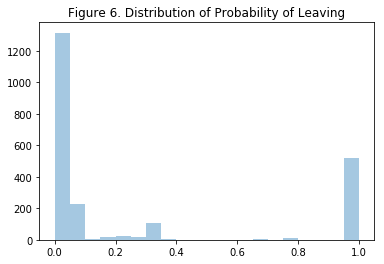

In [82]:
# Investigate probabilities of leaving predicted by our model
import seaborn as sns
leave_probabilities = final_model.predict_proba(X_test)[:,1]

ax = plt.axes()
sns.distplot(leave_probabilities, kde=False, bins=20, ax=ax)

# sns.heatmap(data, ax = ax)
ax.set_title('Figure 6. Distribution of Probability of Leaving')
plt.show()

<h3>Observations</h3>

Our probability distributions are nicely gathered at the extremes, ie. provide a high probability of either remain or leave. There is a small group with probability ~0.3 of leaving. These may be worth investigating further if there is a need to further tweak performance.

In [83]:
# These are the contributing components of our pipeline that constitutes our final model
final_feature_filter_transform = final_model.named_steps['feature_filter_transform']
final_tree_clf = final_model.named_steps['classifier']

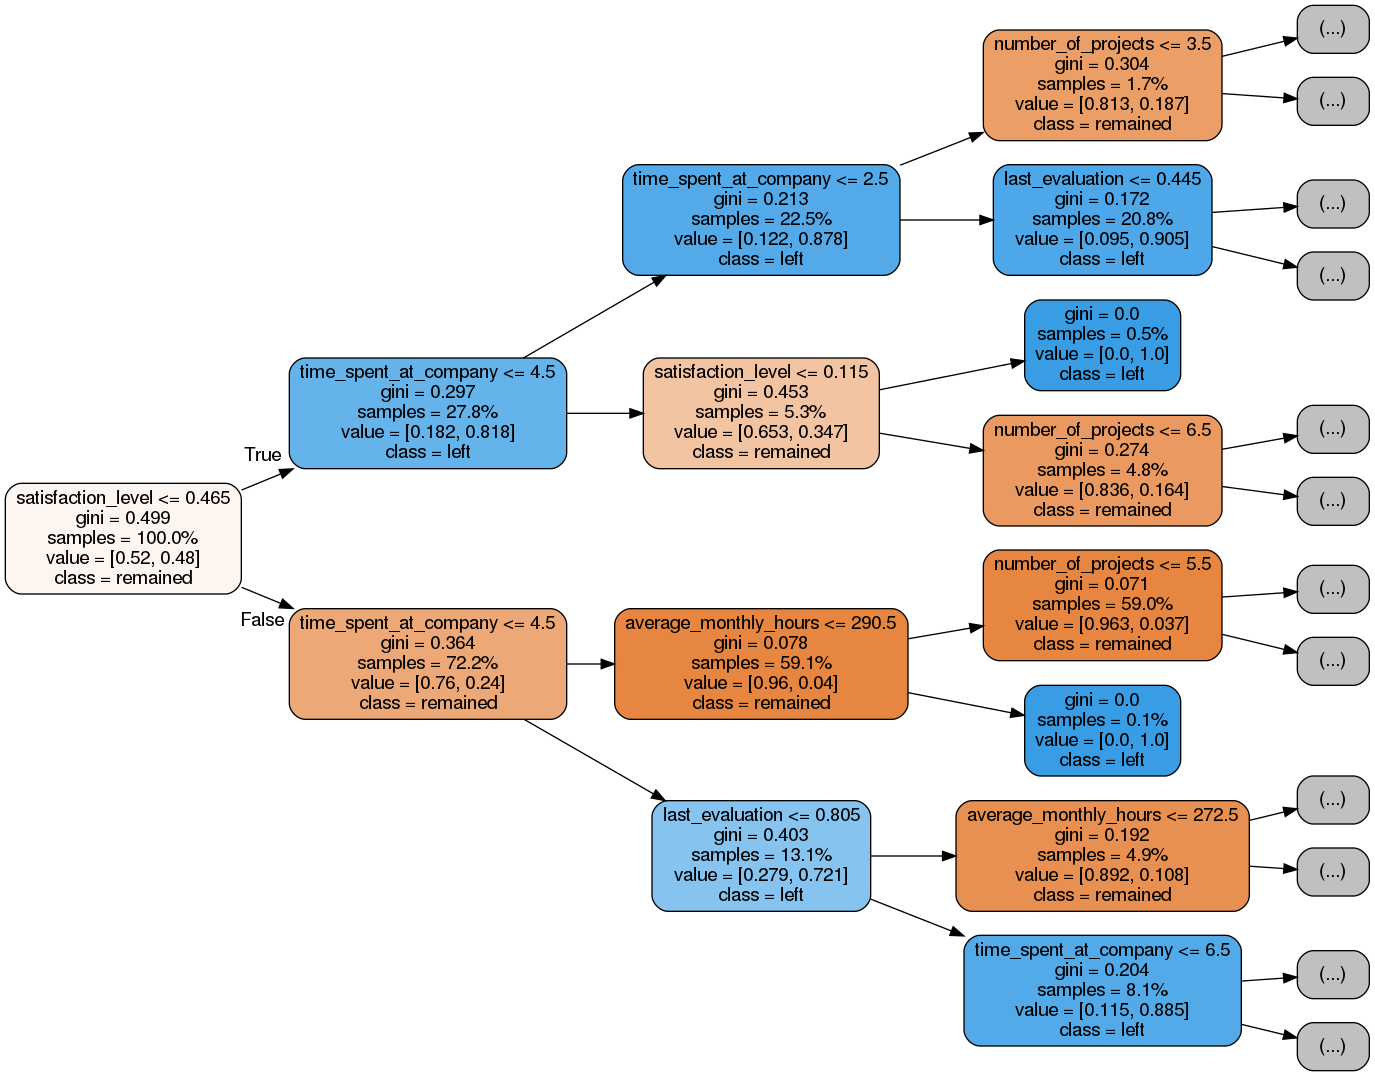

In [84]:
# Visualise the decision tree

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

feature_names = final_feature_filter_transform.transform(X_test).columns

dot_data = export_graphviz(final_tree_clf,
                           feature_names=feature_names,
                           class_names=['remained', 'left'],
                           filled=True,
                           rounded=True,
                           proportion=True,
                           max_depth=3,
                           rotate=True,
                           out_file=None)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)  
Image(graph.create_png())

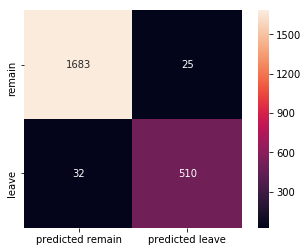

In [85]:
# Visualises types of misclassifications
from sklearn.metrics import confusion_matrix

transformed_X_test = final_feature_filter_transform.transform(X_test)
Y_preds = final_tree_clf.predict(transformed_X_test)
cm = confusion_matrix(Y_test, Y_preds).astype(int)
_ = sns.heatmap(cm,
                fmt='d',
                square=True,
                annot=True,
                yticklabels=['remain', 'leave'],
                xticklabels=['predicted remain', 'predicted leave'])